In [4]:
import matplotlib.pyplot as plt
import sys
import numpy as np

import sympy as sp
import re

sys.path.append("../run/")
import BondGraph as bg


Example 1: 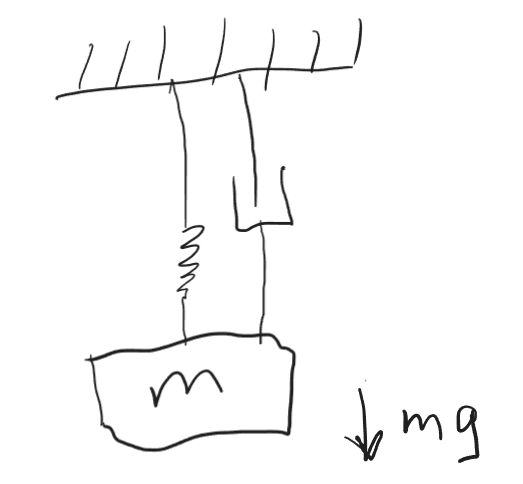

In [5]:
# Create empty model
model = bg.BondGraph(Name ='My Bond graph model')

In [6]:
#Create some elements
SE_1 = bg.BGelement('SE')
SF_1 = bg.BGelement('SF', Position=[2,1])
C_1 = bg.BGelement('C', Position=[3,6])
R_1 = bg.BGelement('R', Position=[3,4])
I_1 = bg.BGelement('I', Position=[0,3])
OneJ_1 = bg.BGelement('1', Position=[0,1])
OneJ_2 = bg.BGelement('1', Position=[1,1])
OneJ_3 = bg.BGelement('1', Position=[2,0])
ZeroJ_1 = bg.BGelement('0', Position=[1,0])
# print(C)

In [7]:
# Add the created elements to the model
model.addElement(OneJ_1)
model.addElement(OneJ_2)
model.addElement(OneJ_3)
model.addElement(ZeroJ_1)
model.addElement(C_1)
model.addElement(R_1)

model.addElement(I_1)
model.addElement(SE_1)
model.addElement(SF_1)
# print(model)

In [8]:
# add a connections between elements in model
model.connect(SE_1, OneJ_1)
model.connect(I_1, OneJ_1)
model.connect(OneJ_1, ZeroJ_1)
model.connect(ZeroJ_1, OneJ_2)
model.connect(ZeroJ_1, OneJ_3)
model.connect(C_1, OneJ_2)
model.connect(R_1, OneJ_2)
model.connect(OneJ_3, SF_1)

In [9]:
model.applyRules()

NB! None val
NB! None val
NB! None val
NB! None val


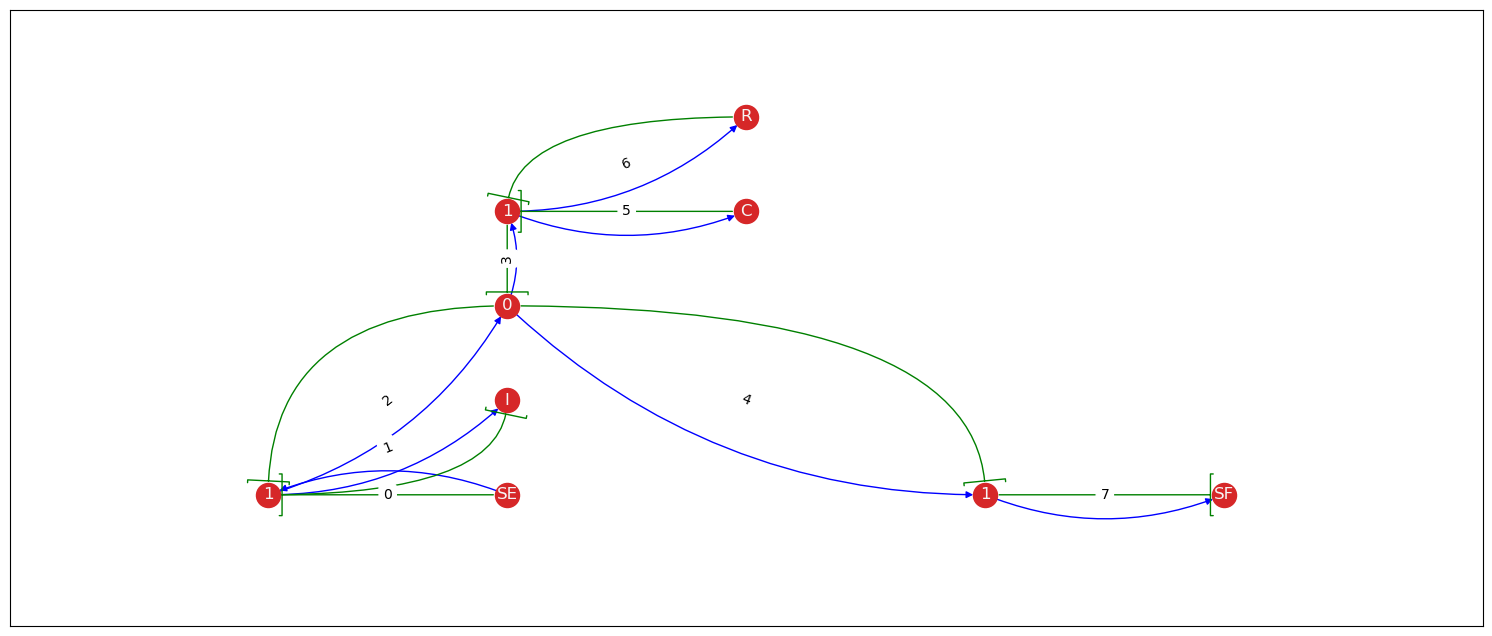

In [10]:
# Set positions automatically for drawing
# some automatically done works on model
model.render()
model.draw()

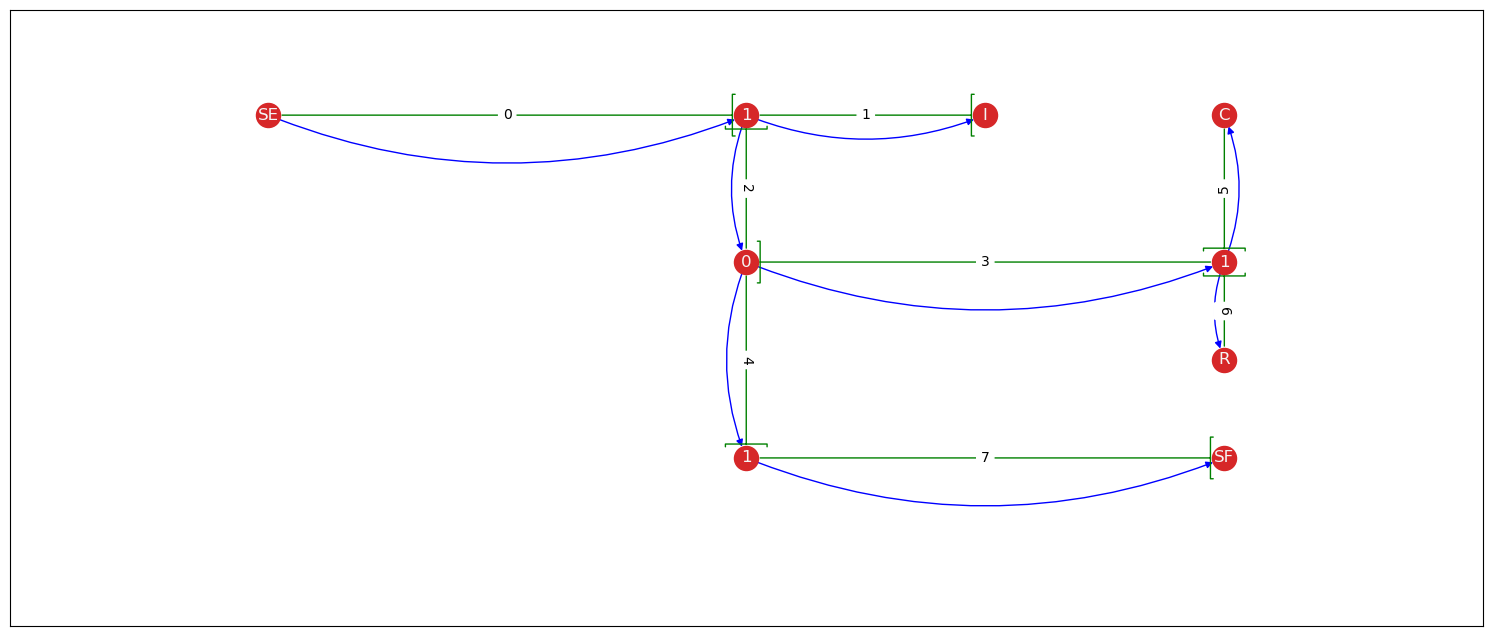

In [11]:
# set positions manually
SE_1.setPosition([0,7])
OneJ_1.setPosition([2,7])
OneJ_2.setPosition([4,4])
OneJ_3.setPosition([2,0])
ZeroJ_1.setPosition([2,4])
I_1.setPosition([3,7])
C_1.setPosition([4,7])
R_1.setPosition([4,2])
SF_1.setPosition([4,0])

# draw
model.draw()

In [13]:
bg.show_ports_state(model)

Element name:  1_14
++ port_id: 1 |  arrow:  Input |  causality:  Causal
++ port_id: 3 |  arrow:  Output |  causality:  Uncausal
++ port_id: 4 |  arrow:  Output |  causality:  Causal
Element name:  1_15
++ port_id: 7 |  arrow:  Input |  causality:  Uncausal
++ port_id: 11 |  arrow:  Output |  causality:  Causal
++ port_id: 13 |  arrow:  Output |  causality:  Causal
Element name:  1_16
++ port_id: 9 |  arrow:  Input |  causality:  Causal
++ port_id: 14 |  arrow:  Output |  causality:  Uncausal
Element name:  0_17
++ port_id: 5 |  arrow:  Input |  causality:  Uncausal
++ port_id: 6 |  arrow:  Output |  causality:  Causal
++ port_id: 8 |  arrow:  Output |  causality:  Uncausal
Element name:  C_11
++ port_id: 10 |  arrow:  Input |  causality:  Uncausal
Element name:  R_12
++ port_id: 12 |  arrow:  Input |  causality:  Uncausal
Element name:  I_13
++ port_id: 2 |  arrow:  Input |  causality:  Causal
Element name:  SE_9
++ port_id: 0 |  arrow:  Output |  causality:  Uncausal
Element name:  S

## assign_equations SEQ


In [14]:
model.assign_equations()
equastions = model.get_model_equations()


assign_bonds...
both elements found... 9 14 SE 1 -----------------------
both elements found... 14 13 1 I -----------------------
Express: not found the variable, inverse variable check
both elements found... 14 17 1 0 -----------------------
both elements found... 17 15 0 1 -----------------------
Express: not found the variable, inverse variable check
both elements found... 17 16 0 1 -----------------------
both elements found... 15 11 1 C -----------------------
both elements found... 15 12 1 R -----------------------
both elements found... 16 10 1 SF -----------------------
Express: not found the variable, inverse variable check
assign_bonds...
both elements found... 9 14 SE 1 -----------------------
both elements found... 14 13 1 I -----------------------
Express: not found the variable, inverse variable check
both elements found... 14 17 1 0 -----------------------
both elements found... 17 15 0 1 -----------------------
Express: not found the variable, inverse variable check
bot

In [15]:
equastions

['+e0=+SE9',
 '+f0=+f1=+f2',
 '+e1=+e0-e2',
 '+f1=+1/I13*p13',
 '+e2=+e3=+e4',
 '+f0=+f1=+f2',
 '+e3=+e5+e6',
 '+f3=+f2-f4',
 '+e4=+e7',
 '+f4=+f7',
 '+e5=+1/C11*q11',
 '+f3=+f5=+f6',
 '+e6=+R12*f6',
 '+f3=+f5=+f6',
 '+e7=+e4',
 '+f7=+SF10']

In [16]:

equastions_eq_zero = model.express_eq_as_zero(equastions)
equastions_eq_zero

['-e0+SE9',
 '-f0+f1',
 '-f0+f2',
 '-e1+e0-e2',
 '-f1+1/I13*p13',
 '-e2+e3',
 '-e2+e4',
 '-f0+f1',
 '-f0+f2',
 '-e3+e5+e6',
 '-f3+f2-f4',
 '-e4+e7',
 '-f4+f7',
 '-e5+1/C11*q11',
 '-f3+f5',
 '-f3+f6',
 '-e6+R12*f6',
 '-f3+f5',
 '-f3+f6',
 '-e7+e4',
 '-f7+SF10']

## State-space form sequence

In [17]:
cauchy_state_equastions, variables_exp  = model.cauchy_form_equastions_sequence()

assign_bonds...
both elements found... 9 14 SE 1 -----------------------
both elements found... 14 13 1 I -----------------------
Express: not found the variable, inverse variable check
both elements found... 14 17 1 0 -----------------------
both elements found... 17 15 0 1 -----------------------
Express: not found the variable, inverse variable check
both elements found... 17 16 0 1 -----------------------
both elements found... 15 11 1 C -----------------------
both elements found... 15 12 1 R -----------------------
both elements found... 16 10 1 SF -----------------------
Express: not found the variable, inverse variable check
assign_bonds...
both elements found... 9 14 SE 1 -----------------------
both elements found... 14 13 1 I -----------------------
Express: not found the variable, inverse variable check
both elements found... 14 17 1 0 -----------------------
both elements found... 17 15 0 1 -----------------------
Express: not found the variable, inverse variable check
bot

In [18]:
model.final_variables


[SE9, SF10, q11, p13, C11, R12, I13]

In [19]:
cauchy_state_equastions

{'dq11/dt': -SF10 + p13/I13, 'dp13/dt': R12*SF10 + SE9 - R12*p13/I13 - q11/C11}

In [20]:
#just show
print("############## STATE EQUASIONS ############")
for i in cauchy_state_equastions.keys():
    print(i, '=', cauchy_state_equastions[i])
print("####################################################")
print(cauchy_state_equastions, model.state_variables)

############## STATE EQUASIONS ############
dq11/dt = -SF10 + p13/I13
dp13/dt = R12*SF10 + SE9 - R12*p13/I13 - q11/C11
####################################################
{'dq11/dt': -SF10 + p13/I13, 'dp13/dt': R12*SF10 + SE9 - R12*p13/I13 - q11/C11} [q11, p13]


In [21]:
print('effort-flow list: ', model.eff_flows_sp, '\nvariables list: ', model.final_variables, '\n ', model.state_variables, model.input_variables)

effort-flow list:  [f0, e1, e3, f5, f7, e2, f4, e0, e5, e6, f3, f6, e4, f1, f2, e7] 
variables list:  [SE9, SF10, q11, p13, C11, R12, I13] 
  [q11, p13] [SE9, SF10]


In [22]:
variables_exp

{f0: [f1],
 e1: [e0 - e2],
 e3: [e5 + e6],
 f5: [f3],
 f7: [SF10],
 e2: [e3],
 f4: [f7],
 e0: [SE9],
 e5: [q11/C11],
 e6: [R12*f6],
 f3: [f2 - f4],
 f6: [f3],
 e4: [e2],
 f1: [p13/I13],
 f2: [f0],
 e7: [e4]}

## Make state-space eq in matrix from

In [23]:
cauchy_state_equastions

{'dq11/dt': -SF10 + p13/I13, 'dp13/dt': R12*SF10 + SE9 - R12*p13/I13 - q11/C11}

In [24]:
model.make_state_statespace(cauchy_state_equastions)
print(f'Matrix A: {model.A} \n Matrix B: {model.B}\n input_variables: {model.input_variables} \n state_variables: {model.state_variables}')

(-1, SF10) --------------
(p13, 1/I13) --------------
() --------------
(R12, SF10) --------------
(-1, q11, 1/C11) --------------
(-1, R12, p13, 1/I13) --------------
Matrix([[0, 1/I13], [-1/C11, -R12/I13]])
(-1, SF10) --------------
(p13, 1/I13) --------------
() --------------
(R12, SF10) --------------
(-1, q11, 1/C11) --------------
(-1, R12, p13, 1/I13) --------------
Matrix([[0, -1], [1, R12]])
Matrix A: Matrix([[0, 1/I13], [-1/C11, -R12/I13]]) 
 Matrix B: Matrix([[0, -1], [1, R12]])
 input_variables: [SE9, SF10] 
 state_variables: [q11, p13]


In [25]:
model.A

Matrix([
[     0,    1/I13],
[-1/C11, -R12/I13]])

In [26]:
model.B

Matrix([
[0,  -1],
[1, R12]])

B_matrix = model.make_matrix_from_cauchy(B_matrix, cauchy_state_equastions, model.input_variables)
B_matrix

## Make С-В-matrix
Now we can set the input variables and get С-В-matrix

In [27]:
# Enter for example f5, e5
cauchy_form_output_eq = model.cauchy_form_output_eq(variables_exp,'f5, e5')

Input the names of output variables:
It mast be in list eff_flows:  [f0, e1, e3, f5, f7, e2, f4, e0, e5, e6, f3, f6, e4, f1, f2, e7] (Velocity of Force at some point)
U entered this:  ['f5', ' e5']
output variable=  f5
first match [f3]
next iteration with expression: f2 - f4
next iteration with expression: f0 - f7
next iteration with expression: -SF10 + f1
next iteration with expression: -SF10 + p13/I13
output variable=  e5
first match [q11/C11]


In [28]:
cauchy_form_output_eq 

{f5: -SF10 + p13/I13, e5: q11/C11}

In [29]:
model.make_output_statespace(cauchy_form_output_eq)
print(model.C, model.D)

(-1, SF10) --------------
(p13, 1/I13) --------------
Matrix([[0, 1/I13], [1/C11, 0]])
(-1, SF10) --------------
(p13, 1/I13) --------------
Matrix([[0, -1], [0, 0]])
Matrix([[0, 1/I13], [1/C11, 0]]) Matrix([[0, -1], [0, 0]])


In [30]:
model.C

Matrix([
[    0, 1/I13],
[1/C11,     0]])

In [31]:
model.D

Matrix([
[0, -1],
[0,  0]])

## Make numerical matrixes from symbolic

In [32]:
print('List of system parameters:', model.parameter_variables)
parameters_list = model.parameter_variables

parameters_values = [1, 1, 1]

List of system parameters: [C11, R12, I13]


In [33]:
model.input_variables

[SE9, SF10]

In [34]:

initial_state = np.zeros((len(model.state_variables),1)) # fill initials by zero
print("initial_state: ", initial_state)
time_steps=500
sampling_period=0.05
input_sequence =np.ones((time_steps, len(model.input_variables)))
# print("Input sequence:", input_sequence)
input_sequence[:, 0] = 1

initial_state:  [[0.]
 [0.]]


In [35]:
state, output = model.simulate(initial_state, input_sequence, time_steps, sampling_period, parameters_values)    


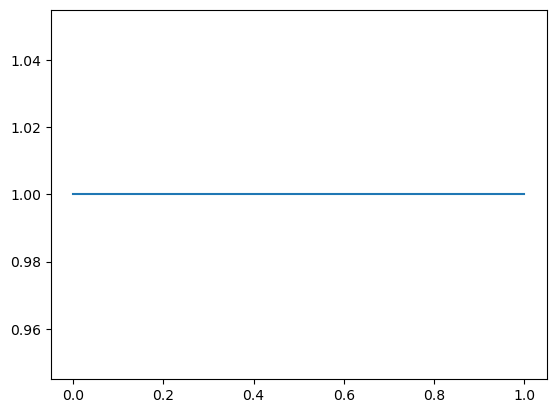

In [36]:
# plot input
plt.plot(input_sequence[0], label='Input)')


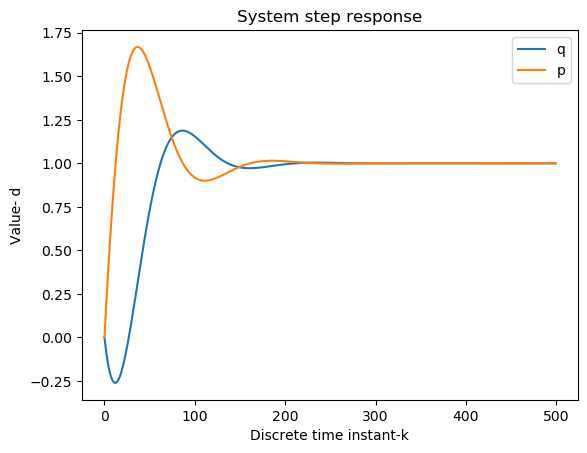

In [37]:
plt.plot(state[0,:-1], label='q')
plt.plot(state[1,:-1], label='p')
plt.xlabel('Discrete time instant-k')
plt.ylabel('Value- d')
plt.title('System step response')
plt.legend()

AS WE CAN SEE MASS_SPRING SYSTEM BECAME STABLE OVER TIME